<a href="https://colab.research.google.com/github/ricefield139/object_detect/blob/main/training_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fiftyone

     |████████████████████████████████| 2.4 MB 36.8 MB/s 
     |████████████████████████████████| 106 kB 71.9 MB/s 
     |████████████████████████████████| 569 kB 55.6 MB/s 
     |████████████████████████████████| 79.9 MB 41 kB/s 
     |████████████████████████████████| 131 kB 65.2 MB/s 
     |████████████████████████████████| 36.7 MB 57 kB/s 
     |████████████████████████████████| 29.2 MB 24 kB/s 
     |████████████████████████████████| 224 kB 65.1 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 557 kB 72.1 MB/s 
     |████████████████████████████████| 20.6 MB 62 kB/s 
     |████████████████████████████████| 76 kB 6.6 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 75 kB 5.4 MB/s 
     |████████████████████████████████| 77 kB 7.5 MB/s 
     |████████████████████████████████| 79 kB 9.6 MB/s 
     |██████████████████████████

In [98]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset_cat = fo.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              dataset_name="test_cat",
              label_types=["detections", "segmentations"],
              classes=["Cat"],
              max_samples=120,
          )

Found 50 images, downloading the remaining 70
 100% |███████████████████| 70/70 [3.2s elapsed, 0s remaining, 22.5 samples/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading existing dataset 'test_cat'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [100]:
session = fo.launch_app(dataset_cat)


In [101]:
dataset_dog = fo.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              dataset_name="test_dog",
              label_types=["detections", "segmentations"],
              classes=["Dog"],
              max_samples=120,
          )

Found 50 images, downloading the remaining 70
 100% |███████████████████| 70/70 [3.2s elapsed, 0s remaining, 23.0 samples/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading existing dataset 'test_dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [ ]:
session = fo.launch_app(dataset_dog)


In [ ]:
dataset_dog

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
!pip install opencv-python

In [6]:
DATA_DIR=os.getcwd() + '/../root/fiftyone/open-images-v6/validation/data'
CATEGORIES =['Cat','Dog']

In [7]:
DATA_DIR

'/content/../root/fiftyone/open-images-v6/validation/data'

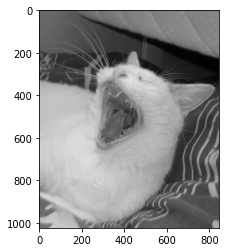

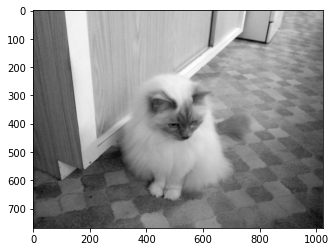

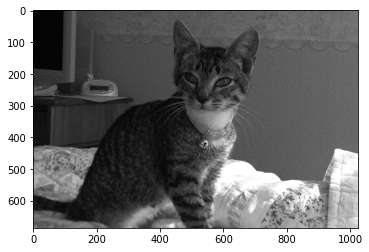

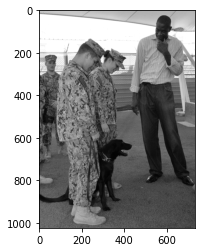

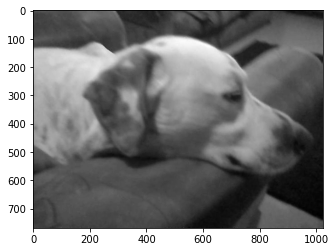

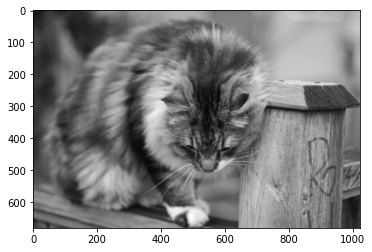

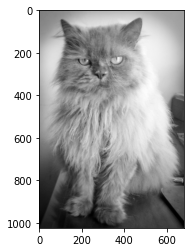

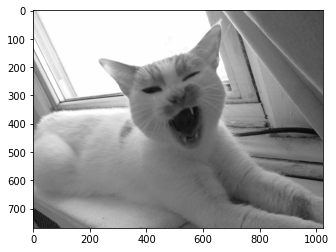

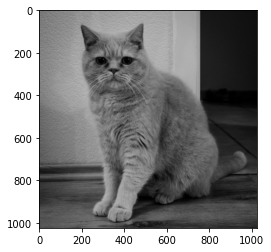

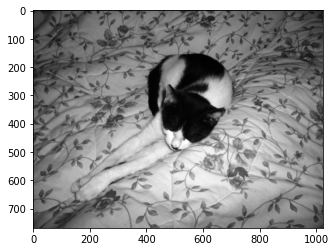

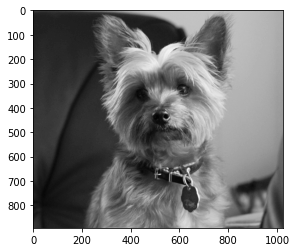

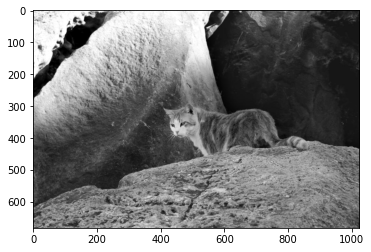

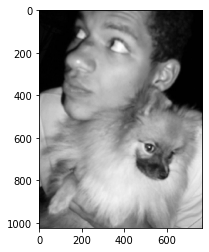

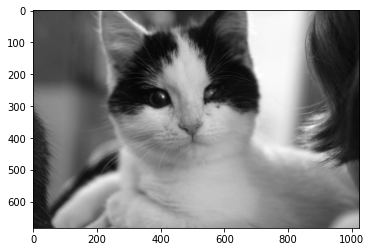

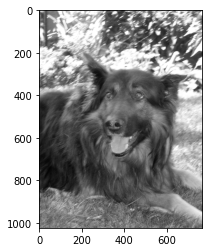

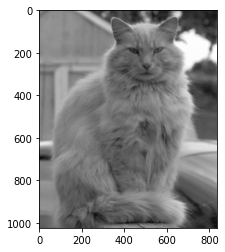

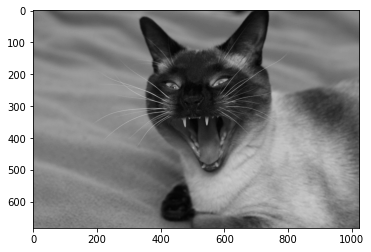

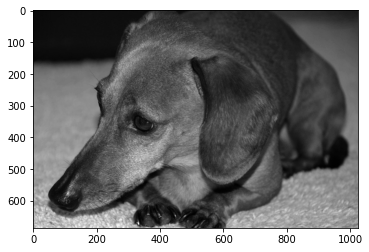

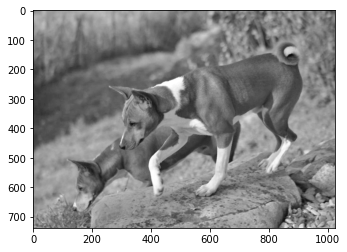

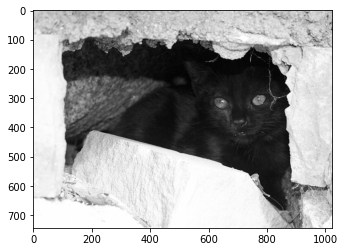

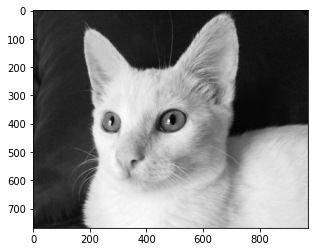

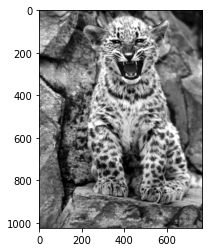

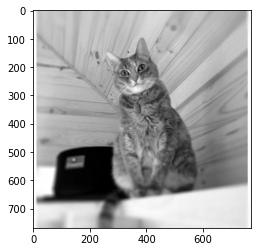

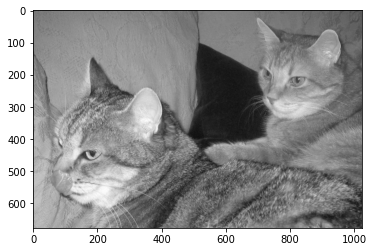

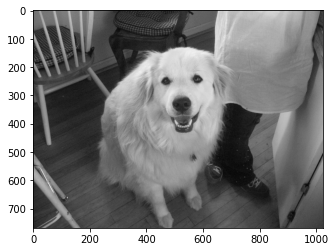

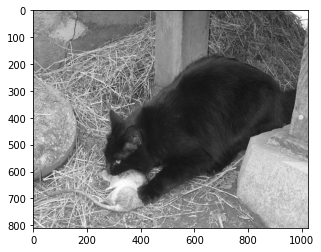

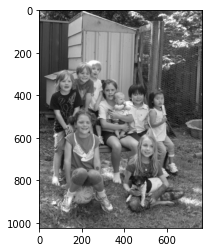

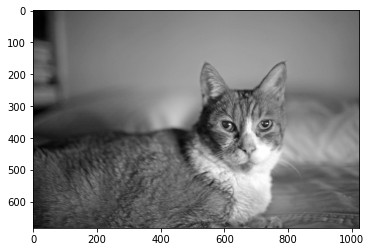

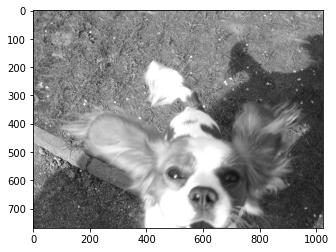

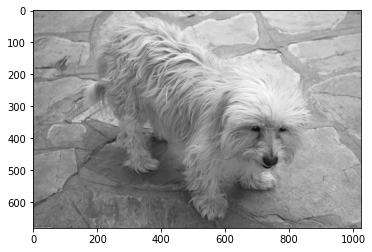

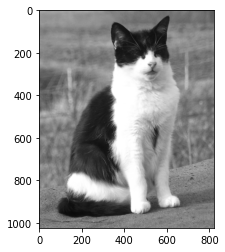

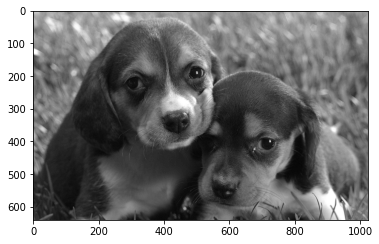

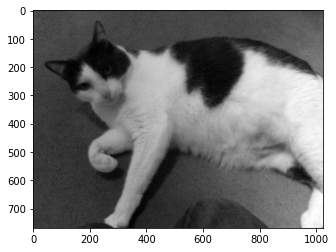

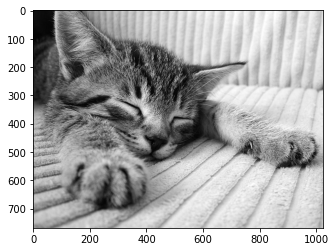

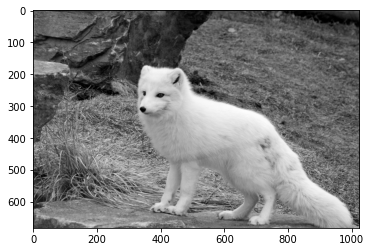

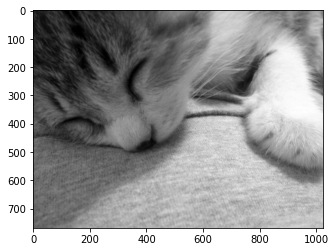

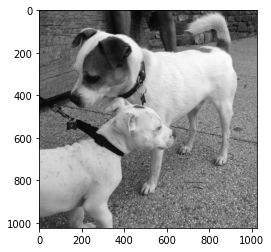

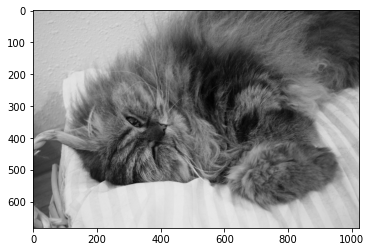

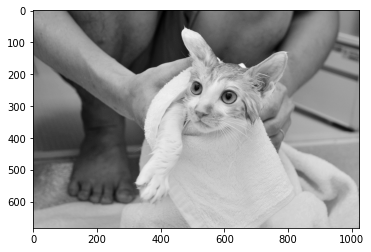

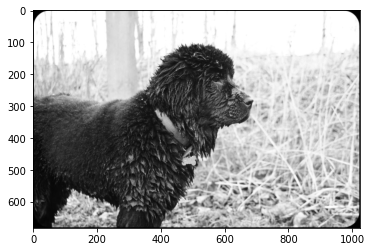

KeyboardInterrupt: ignored

In [102]:
for img in os.listdir(DATA_DIR):
  img_array = cv2.imread(os.path.join(DATA_DIR,img), cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array,cmap="gray")
  plt.show()



In [103]:
#separate the dataset
import shutil
TARGET_DIR="/content/"
os.mkdir(os.path.join(TARGET_DIR, "train"))
TRAIN_CAT_DIR=os.path.join(TARGET_DIR, "train", "cat")
TRAIN_DOG_DIR=os.path.join(TARGET_DIR, "train", "dog")
print(TRAIN_CAT_DIR)
print(TRAIN_DOG_DIR)


/content/train/cat
/content/train/dog


In [104]:
os.mkdir(TRAIN_CAT_DIR)
os.mkdir(TRAIN_DOG_DIR)

In [105]:

for sample in dataset_cat:
  shutil.copy(sample.filepath, TRAIN_CAT_DIR)

In [106]:
for sample in dataset_dog:
  shutil.copy(sample.filepath, TRAIN_DOG_DIR)

In [107]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = os.path.join(TARGET_DIR, "train")

BATCH_SIZE = 9
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


['.ipynb_checkpoints', 'cat', 'dog']


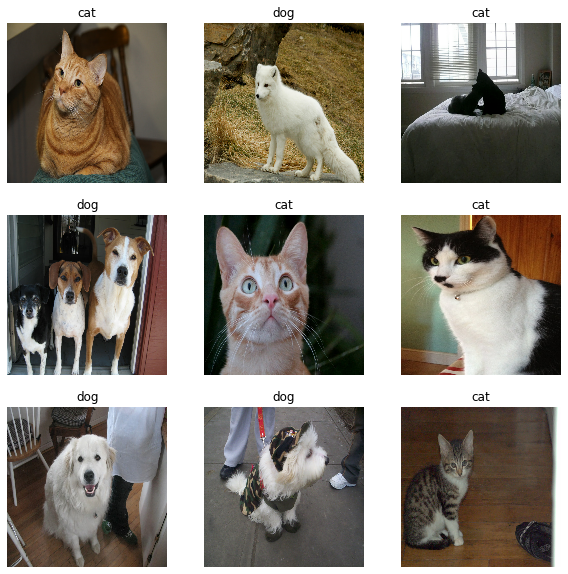

In [76]:
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [47]:
#make validation dir
os.mkdir(os.path.join(TARGET_DIR, "validation"))
validation_dir = os.path.join(TARGET_DIR, "validation")


In [52]:
 # empty list for collecting files
source_files_cat = []  

# walk through directory tree and find files only
for dirpath, dirnames, filenames in os.walk(TRAIN_CAT_DIR):
    for file in filenames:
        if file.endswith(".jpg"):
            source_files_cat.append(os.path.join(dirpath, file))
            

In [61]:
import random

choices_cat = random.sample(source_files_cat, 20)
print(choices_cat)

['/content/train/cat/03ff0c4a800af9ec.jpg', '/content/train/cat/32dca7a4669c8812.jpg', '/content/train/cat/261ee9c44b57481c.jpg', '/content/train/cat/00bdb008eb688497.jpg', '/content/train/cat/0ad3f3375816f9ed.jpg', '/content/train/cat/174d2108eea9b488.jpg', '/content/train/cat/2fb1a38610ed6936.jpg', '/content/train/cat/2d6ca3bfb69477e9.jpg', '/content/train/cat/0f426802e98a8964.jpg', '/content/train/cat/1954c2c745b87bfe.jpg']


In [59]:
#ebin kek lmoa way to make validation dataset

VALID_CAT_DIR=os.path.join(TARGET_DIR, "validation", "cat")
VALID_DOG_DIR=os.path.join(TARGET_DIR, "validation", "dog")
print(VALID_CAT_DIR)
print(VALID_DOG_DIR)
os.mkdir(VALID_CAT_DIR)
os.mkdir(VALID_DOG_DIR)

/content/validation/cat
/content/validation/dog


In [64]:
# copy files to target directory
for files in choices_cat:
    shutil.move(files, VALID_CAT_DIR)

In [65]:
 # empty list for collecting files
source_files_dog = []  

# walk through directory tree and find files only
for dirpath, dirnames, filenames in os.walk(TRAIN_DOG_DIR):
    for file in filenames:
        if file.endswith(".jpg"):
            source_files_dog.append(os.path.join(dirpath, file))

In [66]:
choices_dog = random.sample(source_files_dog, 20)
print(choices_dog)
for files in choices_dog:
    shutil.move(files, VALID_DOG_DIR)

['/content/train/dog/10fc4c099076b4c2.jpg', '/content/train/dog/03646bb2f288eaae.jpg', '/content/train/dog/01125dd72c09cc5a.jpg', '/content/train/dog/04dcab3d8b615aa7.jpg', '/content/train/dog/1a99f1d34f02d628.jpg', '/content/train/dog/00ecc67a6c3a048c.jpg', '/content/train/dog/072279bd41eccf68.jpg', '/content/train/dog/0bdabef3cf2a29d3.jpg', '/content/train/dog/19327f7bf4a78cb6.jpg', '/content/train/dog/0f31cd0c80e69c2a.jpg']


In [67]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 20 files belonging to 2 classes.


In [70]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 2)
validation_dataset = validation_dataset.skip(val_batches // 2)

In [71]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 2
Number of test batches: 1


In [72]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [73]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

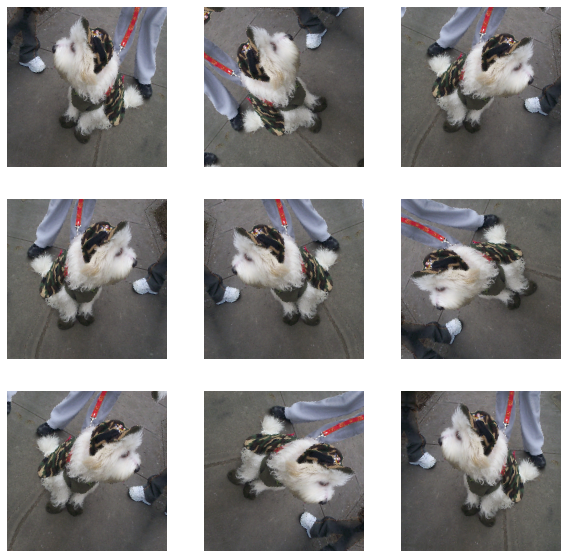

In [77]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [78]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [79]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [80]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(9, 5, 5, 1280)


In [81]:
base_model.trainable = False


In [82]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(9, 1280)


In [83]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(9, 1)


In [84]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [85]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [86]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

In [87]:
len(model.trainable_variables)


2

In [88]:
initial_epochs = 10
#aduh validation dataset
loss0, accuracy0 = model.evaluate(validation_dataset)

2/2 [==============================] - 2s 228ms/step - loss: 0.8127 - accuracy: 0.3636


In [89]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.81
initial accuracy: 0.36


In [90]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
9/9 [==============================] - 4s 71ms/step - loss: 1.5866 - accuracy: 0.0625 - val_loss: 0.6505 - val_accuracy: 0.4545
Epoch 2/10
9/9 [==============================] - 1s 28ms/step - loss: 0.8822 - accuracy: 0.0625 - val_loss: 0.6029 - val_accuracy: 0.2727
Epoch 3/10
9/9 [==============================] - 1s 27ms/step - loss: 0.6424 - accuracy: 0.1250 - val_loss: 0.6429 - val_accuracy: 0.4545
Epoch 4/10
9/9 [==============================] - 1s 28ms/step - loss: 0.4134 - accuracy: 0.2250 - val_loss: 0.7140 - val_accuracy: 0.5455
Epoch 5/10
9/9 [==============================] - 1s 29ms/step - loss: -0.0512 - accuracy: 0.2125 - val_loss: 0.6215 - val_accuracy: 0.7273
Epoch 6/10
9/9 [==============================] - 1s 31ms/step - loss: -0.1975 - accuracy: 0.3500 - val_loss: 0.6603 - val_accuracy: 0.7273
Epoch 7/10
9/9 [==============================] - 1s 32ms/step - loss: -0.5696 - accuracy: 0.3875 - val_loss: 0.9498 - val_accuracy: 0.5455
Epoch 8/10
9/9 [========

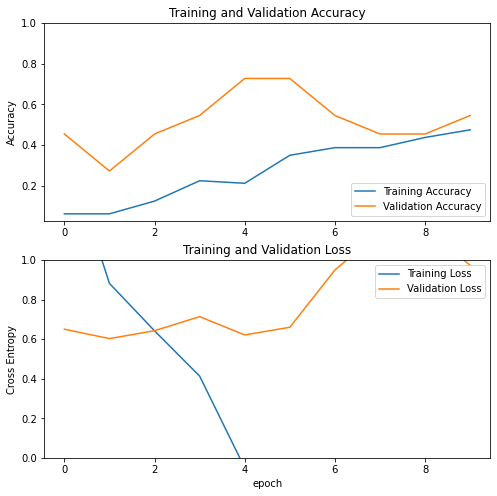

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [92]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 116ms/step - loss: 1.0814 - accuracy: 0.4444
Test accuracy : 0.4444444477558136


Predictions:
 [1 1 1 1 1 1 1 1 1]
Labels:
 [1 1 0 0 0 0 1 0 0]


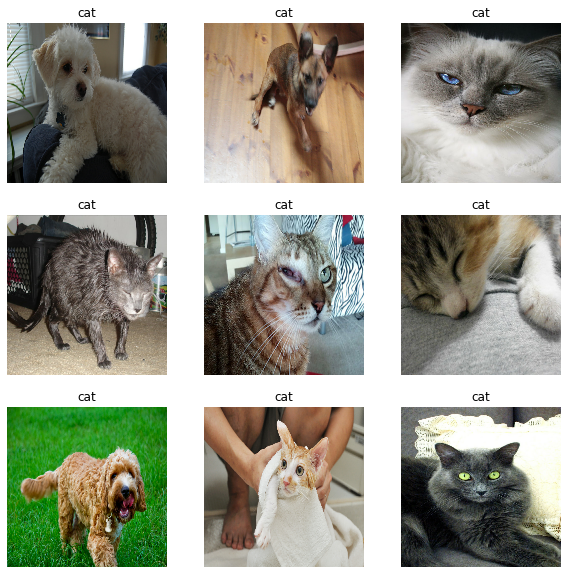

In [93]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [95]:
!dir

sample_data  train  validation


In [96]:
!rm -r train

In [97]:
!rm -r validation